In [1]:
# загружаем библиотеки
import numpy as np
import glob
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# загружаем датасет
!git clone https://github.com/JeffSackmann/tennis_atp

Cloning into 'tennis_atp'...
remote: Enumerating objects: 3353, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 3353 (delta 0), reused 5 (delta 0), pack-reused 3347
Receiving objects: 100% (3353/3353), 281.39 MiB | 17.57 MiB/s, done.
Resolving deltas: 100% (2613/2613), done.
Checking out files: 100% (174/174), done.


In [3]:
glob.glob('tennis_atp/atp_matches_[12][019][01298]*')

['tennis_atp/atp_matches_2017.csv',
 'tennis_atp/atp_matches_2012.csv',
 'tennis_atp/atp_matches_2021.csv',
 'tennis_atp/atp_matches_2004.csv',
 'tennis_atp/atp_matches_2014.csv',
 'tennis_atp/atp_matches_1995.csv',
 'tennis_atp/atp_matches_1982.csv',
 'tennis_atp/atp_matches_1981.csv',
 'tennis_atp/atp_matches_2002.csv',
 'tennis_atp/atp_matches_1980.csv',
 'tennis_atp/atp_matches_2015.csv',
 'tennis_atp/atp_matches_1983.csv',
 'tennis_atp/atp_matches_1987.csv',
 'tennis_atp/atp_matches_2013.csv',
 'tennis_atp/atp_matches_1990.csv',
 'tennis_atp/atp_matches_2016.csv',
 'tennis_atp/atp_matches_1989.csv',
 'tennis_atp/atp_matches_1994.csv',
 'tennis_atp/atp_matches_2020.csv',
 'tennis_atp/atp_matches_2008.csv',
 'tennis_atp/atp_matches_2011.csv',
 'tennis_atp/atp_matches_1999.csv',
 'tennis_atp/atp_matches_2001.csv',
 'tennis_atp/atp_matches_1986.csv',
 'tennis_atp/atp_matches_2022.csv',
 'tennis_atp/atp_matches_1991.csv',
 'tennis_atp/atp_matches_2006.csv',
 'tennis_atp/atp_matches_199

In [4]:
# создаем датфрейм
df = pd.concat([pd.read_csv(i) for i in glob.glob('tennis_atp/atp_matches_[12][019][01298]*')], axis=0)

In [5]:
df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2017-M020,Brisbane,Hard,32,A,20170102,271,104678,NaN,NaN,...,53.0,33.0,13.0,11.0,6.0,10.0,29.0,1385.0,100.0,604.0
1,2017-M020,Brisbane,Hard,32,A,20170102,272,106378,NaN,NaN,...,67.0,39.0,27.0,12.0,9.0,10.0,45.0,1001.0,141.0,443.0
2,2017-M020,Brisbane,Hard,32,A,20170102,273,106298,6.0,NaN,...,42.0,29.0,16.0,12.0,0.0,4.0,15.0,2156.0,25.0,1585.0
3,2017-M020,Brisbane,Hard,32,A,20170102,275,111577,NaN,Q,...,37.0,27.0,7.0,10.0,2.0,5.0,105.0,570.0,34.0,1255.0
4,2017-M020,Brisbane,Hard,32,A,20170102,276,111442,NaN,WC,...,43.0,23.0,13.0,9.0,10.0,15.0,79.0,689.0,160.0,372.0


In [6]:
df.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

In [7]:
# создадим колонку year в удобном формате
df.tourney_date.apply(lambda x: '%.0f' % round(x,0))
df.loc[:, 'tourney_date'] = pd.to_datetime(df['tourney_date'], format='%Y%m%d')
df['year'] = df['tourney_date'].dt.year

### Задача 2
Правда ли, что среднее количество сетов, которое необходимо любому игроку для победы в матче, сокращается со временем? Разбейте данные на две группы — с 1980 до 2001 гг. и 2002-2022 гг. Как изменилось среднее количество сетов, которое победитель затратил на игру? Является ли разница средних этих двух выборок статистически значимой? Выбор статистического теста обоснуйте.

In [8]:
df['score'] = df['score'].fillna('')

In [9]:
df['sets_num'] = df['score'].map(lambda x: len(x.split(' ')))

In [10]:
# посчитаем количство сетов в среднем сыгранных в матчах в каждом году и поделим на 2 выборки по годам
averageNoSets = df[['sets_num']].groupby(df.year).mean().reset_index()

In [11]:
averageNoSets_1979 = averageNoSets[averageNoSets['year'] < 2002]
averageNoSets_1979

,year,sets_num
0,1979,2.354839
1,1980,2.508949
2,1981,2.539130
3,1982,2.555965
4,1983,2.600459
5,1984,2.596059
6,1985,2.604191
7,1986,2.589985
8,1987,2.653341
9,1988,2.661673


In [12]:
averageNoSets_2002 = averageNoSets[averageNoSets['year'] > 2001]
averageNoSets_2002

,year,sets_num
23,2002,2.679739
24,2003,2.673600
25,2004,2.639903
26,2005,2.644608
27,2006,2.666973
28,2007,2.607610
29,2008,2.664686
30,2009,2.663209
31,2010,2.659406
32,2011,2.654726


In [13]:
# проверим нормальность распределения в выборках
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

In [14]:
# Установим уровень значимости
alpha = 0.05

In [15]:
from scipy.stats import shapiro

In [16]:
# Тест Шапиро-Уилка на нормальность распределения
_, p = shapiro(averageNoSets_1979['sets_num'])
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.000
Данные не распределены нормально (мы отвергаем H0)


In [17]:
_, p = shapiro(averageNoSets_2002['sets_num'])
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.595
Данные распределены нормально


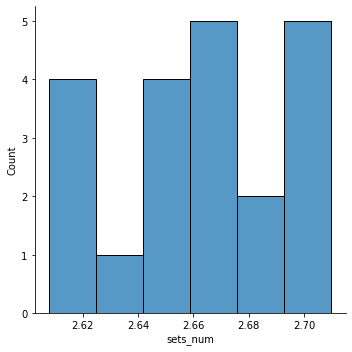

In [18]:
sns.displot(averageNoSets_2002['sets_num']);
#визуально нормальное распределение выборки не подтверждается

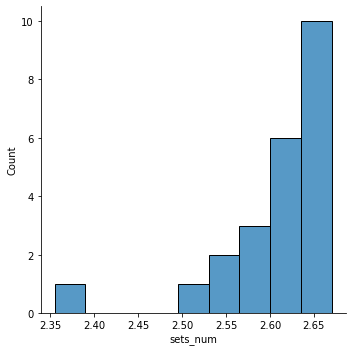

In [19]:
sns.displot(averageNoSets_1979['sets_num']);

In [20]:
H0 = 'Нет значимой разницы между количеством сетов, которое победитель затратил на игру'
Ha = 'Есть значимая разница между между количеством сетов, которое победитель затратил на игру'

Выборки - независимые, не распределены нормально, выбираем непараметрический тест Манна-Уитни. 

Ссылка на документацию https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html?highlight=mann#scipy.stats.mannwhitneyu 

In [21]:
_, p = stats.mannwhitneyu(averageNoSets_2002['sets_num'], averageNoSets_1979['sets_num'], alternative='greater')

In [22]:
if p > alpha:
  print(f"{round(p, 4)} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
else:
  print(f"{round(p, 4)} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

0.0001 <= 0.05. Мы отвергаем нулевую гипотезу. Есть значимая разница между между количеством сетов, которое победитель затратил на игру


### Задача 3
У вас появились сомнения — не является ли результат, который вы посчитали на предыдущем шаге, некорректным. Кажется, что на это мог повлиять формат самого матча — best of 3 или best of 5. Оставьте только матчи best of 5 (колонка best_of) и определите — является ли разница среднего количества сетов, которое сыграл победитель, значимой для выборок матчей по 1980 до 2001 гг. и 2002-2022 гг. Выбор статистического теста обоснуйте.

In [23]:
# отфильтруем матчи, в которых предполагалось 5 сетов
data = df[df['best_of'] == 5].copy()

In [24]:
# посчитаем количство сетов в среднем сыгранных в матчах в каждом году в новом датасете и поделим на 2 выборки по годам
averageNoSets_corr = data[['sets_num']].groupby(data.year).mean().reset_index()

In [25]:
averageNoSets_1979_corr = averageNoSets_corr[averageNoSets_corr['year'] < 2002]
averageNoSets_1979_corr

,year,sets_num
0,1980,3.704947
1,1981,3.645062
2,1982,3.668091
3,1983,3.711738
4,1984,3.645455
5,1985,3.694567
6,1986,3.688013
7,1987,3.701564
8,1988,3.646995
9,1989,3.683353


In [26]:
averageNoSets_2002_corr = averageNoSets_corr[averageNoSets_corr['year'] > 2001]
averageNoSets_2002_corr

,year,sets_num
22,2002,3.723320
23,2003,3.686842
24,2004,3.649194
25,2005,3.666667
26,2006,3.668435
27,2007,3.583784
28,2008,3.657718
29,2009,3.632791
30,2010,3.672087
31,2011,3.596796


In [27]:
# проверим нормальность распределения в выборках
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

In [28]:
# Тест Шапиро-Уилка на нормальность распределения
_, p = shapiro(averageNoSets_1979_corr['sets_num'])
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.410
Данные распределены нормально


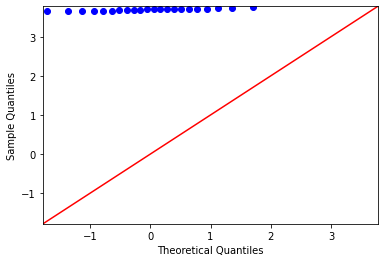

In [29]:
import statsmodels.api as sm
fig = sm.qqplot(averageNoSets_1979_corr['sets_num'], line='45')
plt.show()

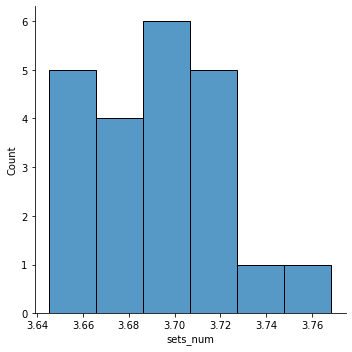

In [30]:
sns.displot(averageNoSets_1979_corr['sets_num']);

In [31]:
# Тест Шапиро-Уилка на нормальность распределения
_, p = shapiro(averageNoSets_2002_corr['sets_num'])
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.603
Данные распределены нормально


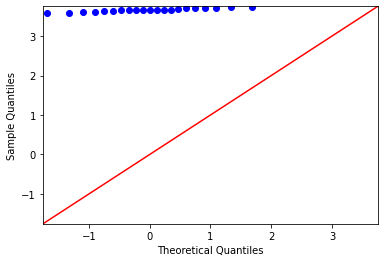

In [32]:
fig = sm.qqplot(averageNoSets_2002_corr['sets_num'], line='45')
plt.show()

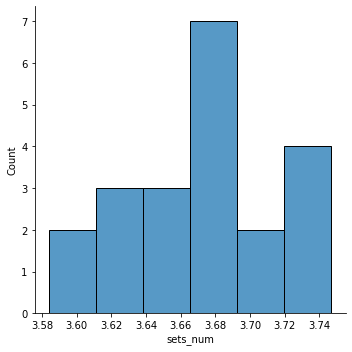

In [33]:
sns.displot(averageNoSets_2002_corr['sets_num']);

Выборки - независимые, не распределены нормально, выбираем непараметрический тест Манна-Уитни.

Ссылка на документацию https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html?highlight=mann#scipy.stats.mannwhitneyu

In [34]:
H0 = 'Нет значимой разницы между количеством сетов, которое победитель затратил на игру'
Ha = 'Есть значимая разница между между количеством сетов, которое победитель затратил на игру'

In [35]:
_, p = stats.mannwhitneyu(averageNoSets_2002_corr['sets_num'], averageNoSets_1979_corr['sets_num'], alternative='greater')

In [36]:
if p > alpha:
  print(f"{round(p, 4)} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
else:
  print(f"{round(p, 4)} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

0.9324 > 0.05. Мы не можем отвергнуть нулевую гипотезу. Нет значимой разницы между количеством сетов, которое победитель затратил на игру


# Задача 4
Вы хотите изучить психологическую устойчивость профессиональных игроков в теннис. Одним из важных показателей такой устойчивости будет доля выигранных брейк-поинтов. Возьмите трех игроков (они необязательно должны играть в одно и то же время. Можете взять игроков, которые сильно отличаются по рангу, а можете взять примерно равных игроков), для каждого из них посчитайте долю выигранных брейк поинтов (колонки, заканчивающиеся на bpFaced и bpSaved) отдельно в победных и проигранных матчах за минимум 10 лет (можно больше, но годы должны идти подряд). Постройте box-plot’ы для этих статистик для каждого из игроков. Являются ли эти распределения по годам (по победным и по проигранным матчам) независимыми для каждого из игроков? Если сравнивать эту статистику между игроками — будет ли разница в средних для проигранных и выигранных матчей значимой попарно между всеми игроками? Выбор статистического теста обоснуйте.

In [37]:
# сделаем колонки - доля выигранных брейк поинтов отдельно в победных и проигранных матчах
df['w_bpSaved%'] = (df['w_bpSaved'] / (df['w_bpFaced'] + df['w_bpSaved'])) * 100
df['l_bpSaved%'] = (df['l_bpSaved'] / (df['l_bpFaced'] + df['l_bpSaved'])) * 100

In [38]:
# выберем 3 теннисистов
df_novak_win = df[df['winner_name'] == 'Novak Djokovic']
df_novak_los = df[df['loser_name'] == 'Novak Djokovic']

In [39]:
df_volkov_win = df[df['winner_name'] == 'Alexander Volkov']
df_volkov_los = df[df['loser_name'] == 'Alexander Volkov']

In [40]:
df_cherkasov_win = df[df['winner_name'] == 'Andrei Cherkasov']
df_cherkasov_los = df[df['loser_name'] == 'Andrei Cherkasov']

In [41]:
sns.set()


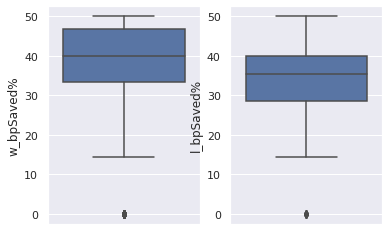

In [42]:
# сравним распределение у Новака Джоковича
fig, axes = plt.subplots(1, 2)
sns.boxplot(data=df_novak_win, y='w_bpSaved%', ax=axes[0])
sns.boxplot(data=df_novak_los, y='l_bpSaved%', ax=axes[1])

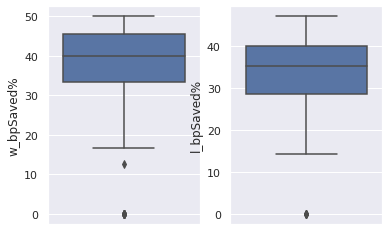

In [43]:
# сравним распределение у Волкова
fig, axes = plt.subplots(1, 2)
sns.boxplot(data=df_volkov_win, y='w_bpSaved%', ax=axes[0])
sns.boxplot(data=df_volkov_los, y='l_bpSaved%', ax=axes[1])

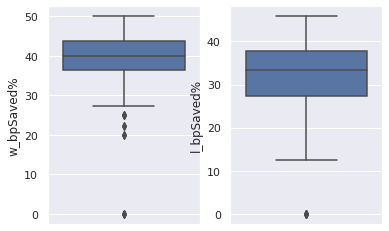

In [44]:
# сравним распределение у Черкасова
fig, axes = plt.subplots(1, 2)
sns.boxplot(data=df_cherkasov_win, y='w_bpSaved%', ax=axes[0])
sns.boxplot(data=df_cherkasov_los, y='l_bpSaved%', ax=axes[1])

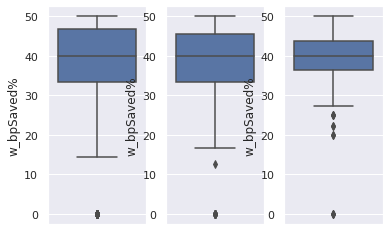

In [275]:
# сравним распределение в победных матчах
fig, axes = plt.subplots(1, 3)
sns.boxplot(data=df_novak_win, y='w_bpSaved%', ax=axes[0])
sns.boxplot(data=df_volkov_win, y='w_bpSaved%', ax=axes[1])
sns.boxplot(data=df_cherkasov_win, y='w_bpSaved%', ax=axes[2])

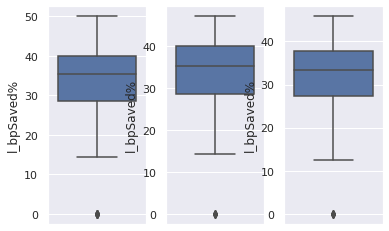

In [277]:
# сравним распределение в проигранных матчах
fig, axes = plt.subplots(1, 3)
sns.boxplot(data=df_novak_los, y='l_bpSaved%', ax=axes[0])
sns.boxplot(data=df_volkov_los, y='l_bpSaved%', ax=axes[1])
sns.boxplot(data=df_cherkasov_los, y='l_bpSaved%', ax=axes[2])

##### Визуально статистических различий не видно между количеством выигранных брейк поинтов в выигранных и проигранных матчах

In [45]:
df_novak_win.groupby(df_novak_win['year']).mean()['w_bpSaved%']

year
2004    28.571429
2005    39.454365
2006    36.535127
2007    38.940677
2008    38.851469
2009    37.711317
2010    39.811323
2011    37.506205
2012    38.046018
2013    37.208388
2014    36.141094
2015    35.231056
2016    35.946668
2017    39.052970
2018    38.247036
2019    38.172396
2020    38.868163
2021    34.838015
2022    33.058081
Name: w_bpSaved%, dtype: float64

In [46]:
df_novak_los.groupby(df_novak_los['year']).mean()['l_bpSaved%']

year
2004    30.416667
2005    34.335760
2006    32.742339
2007    32.765281
2008    36.068118
2009    34.975030
2010    35.342573
2011    30.574879
2012    31.425855
2013    36.278389
2014    29.188312
2015    34.880414
2016    36.422466
2017    27.564484
2018    32.116250
2019    26.779221
2020    31.468991
2021    34.041514
2022    31.460037
Name: l_bpSaved%, dtype: float64

In [47]:
df_volkov_win.groupby(df_volkov_win['year']).mean()['w_bpSaved%']

year
1986          NaN
1987          NaN
1988          NaN
1989          NaN
1990          NaN
1991    36.909948
1992    39.320106
1993    40.418390
1994    33.734301
1995    37.621291
1996    38.232509
1997    34.006186
Name: w_bpSaved%, dtype: float64

In [48]:
df_cherkasov_los.groupby(df_cherkasov_los['year']).mean()['l_bpSaved%']

year
1988          NaN
1989          NaN
1990    44.444444
1991    35.141528
1992    31.784539
1993    32.147667
1994    27.905922
1995    31.500000
1996    28.167644
1997    29.417371
1998    33.429027
1999    35.558608
2000    25.000000
Name: l_bpSaved%, dtype: float64

In [49]:
df_cherkasov_win.groupby(df_cherkasov_win['year']).mean()['w_bpSaved%']

year
1988          NaN
1989          NaN
1990          NaN
1991    39.333707
1992    40.513643
1993    38.593126
1994    35.184372
1995    20.000000
1996    40.989729
1997    39.102564
1999    39.777778
2000     0.000000
Name: w_bpSaved%, dtype: float64

##### Черкасов и Волков примерно в одно время играли и может быть зависимое распределение

In [50]:
df[(df['winner_name'] == 'Alexander Volkov') & (df['loser_name'] == 'Andrei Cherkasov')]

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year,sets_num,w_bpSaved%,l_bpSaved%
510,1993-408,Milan,Carpet,32,A,1993-02-08,14,101334,NaN,NaN,...,0.0,4.0,18.0,1386.0,35.0,869.0,1993,2,50.000000,0.000000
2720,1993-422,Cincinnati Masters,Hard,56,M,1993-08-09,31,101334,12.0,NaN,...,5.0,9.0,16.0,1410.0,47.0,722.0,1993,2,46.153846,35.714286


In [51]:
df[(df['winner_name'] == 'Andrei Cherkasov') & (df['loser_name'] == 'Alexander Volkov')]

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year,sets_num,w_bpSaved%,l_bpSaved%
2658,1991-419,Indianapolis,Hard,56,A,1991-08-12,47,101772,8.0,NaN,...,9.0,13.0,14.0,1269.0,24.0,994.0,1991,2,41.176471,40.909091
3663,1993-429,Stockholm Masters,Carpet,48,M,1993-10-25,26,101772,NaN,NaN,...,6.0,9.0,40.0,836.0,16.0,1404.0,1993,3,37.500000,40.000000
388,1992-408,Milan,Carpet,32,A,1992-02-03,20,101772,NaN,NaN,...,3.0,6.0,19.0,NaN,25.0,NaN,1992,2,40.000000,33.333333


##### Выборки по Черкасову и Волкову независимые, так как всего 5 наблюдений у них совпадает, что не так велико

In [52]:
# проверим нормальность распределения всех выборок


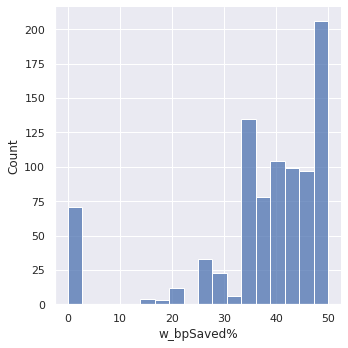

In [53]:
sns.displot(df_novak_win['w_bpSaved%']);

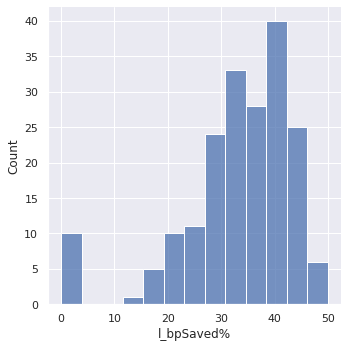

In [54]:
sns.displot(df_novak_los['l_bpSaved%']);

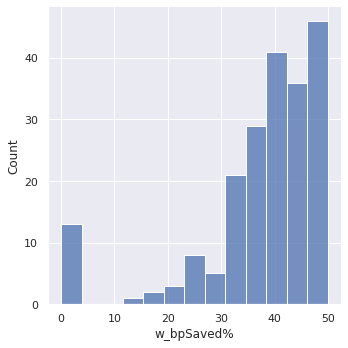

In [55]:
sns.displot(df_volkov_win['w_bpSaved%']);

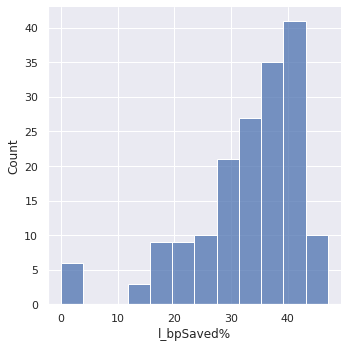

In [56]:
sns.displot(df_volkov_los['l_bpSaved%']);

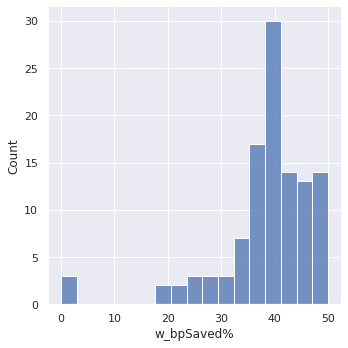

In [57]:
sns.displot(df_cherkasov_win['w_bpSaved%']);

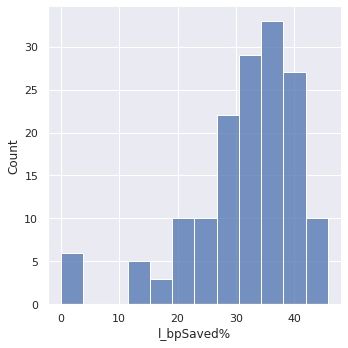

In [58]:
sns.displot(df_cherkasov_los['l_bpSaved%']);

Все выборки распределены ненормально.
Выборки независимые

Для по парной проверки выборк будет использован тест Манна-Уитни https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html?highlight=mann#scipy.stats.mannwhitneyu

In [59]:
#df_cherkasov_win['w_bpSaved%'] = df_cherkasov_win['w_bpSaved%'].fillna(0)
#df_volkov_win['w_bpSaved%'] = df_volkov_win['w_bpSaved%'].fillna(0)
#df_cherkasov_los['l_bpSaved%']= df_cherkasov_los['l_bpSaved%'].fillna(0)
#df_volkov_los['l_bpSaved%'] = df_volkov_los['l_bpSaved%'].fillna(0)
#df_novak_win['w_bpSaved%'] = df_novak_win['w_bpSaved%'].fillna(0)
#df_novak_los['l_bpSaved%'] = df_novak_los['l_bpSaved%'].fillna(0)

In [60]:
# удалим пустые значения
df_cherkasov_win.dropna(subset=['w_bpSaved%'], inplace=True)
df_volkov_win.dropna(subset=['w_bpSaved%'], inplace=True)
df_cherkasov_los.dropna(subset=['l_bpSaved%'], inplace=True)
df_volkov_los.dropna(subset=['l_bpSaved%'], inplace=True)
df_novak_win.dropna(subset=['w_bpSaved%'], inplace=True)
df_novak_los.dropna(subset=['l_bpSaved%'], inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [61]:
_, p = stats.mannwhitneyu(df_novak_win['w_bpSaved%'], df_volkov_win['w_bpSaved%'], alternative='two-sided')
p

0.8217611711327845

In [62]:
_, p = stats.mannwhitneyu(df_novak_los['l_bpSaved%'], df_volkov_los['l_bpSaved%'], alternative='two-sided')
p

0.5717959706094793

У Новака Джоковича статистически нет развницы в % выигранных брейк-поинтов, чем у Волкова, и в выигранных, и в пригранных матчах

In [63]:
_, p = stats.mannwhitneyu(df_novak_win['w_bpSaved%'], df_cherkasov_win['w_bpSaved%'], alternative='less')
p

0.728705796210331

In [64]:
_, p = stats.mannwhitneyu(df_novak_los['l_bpSaved%'], df_cherkasov_los['l_bpSaved%'], alternative='greater')
p

0.018127505810518

У Новака Джоковича статистически выше % выигранных брейк-поинтов, чем у Черкасова, только в проигранных матчах

In [65]:
_, p = stats.mannwhitneyu(df_cherkasov_win['w_bpSaved%'], df_volkov_win['w_bpSaved%'], alternative='less')
p

0.32299337710472653

In [66]:
_, p = stats.mannwhitneyu(df_cherkasov_los['l_bpSaved%'], df_volkov_los['l_bpSaved%'], alternative='two-sided')
p

0.11494657145843193

In [67]:
#_, p = stats.mannwhitneyu(df_cherkasov_los['l_bpSaved%'], df_volkov_los['l_bpSaved%'], alternative='greater')
#p

0.9426623216345511

In [68]:
#_, p = stats.mannwhitneyu(df_cherkasov_los['l_bpSaved%'], df_volkov_los['l_bpSaved%'], alternative='less')
#p

0.057473285729215964

У Волкова статистически нет разницы в % выигранных брейк-поинтов, чем у Черкасова, в выигранных и проигранных матчах

In [69]:
# сравним рейтинги игроков
df_rating = df[(df['winner_name'] == 'Novak Djokovic') | (df['winner_name'] == 'Alexander Volkov') | (df['winner_name'] == 'Andrei Cherkasov')]
df_rating[['winner_rank']].groupby(df_rating['winner_name']).mean()

,winner_rank
winner_name,
Alexander Volkov,46.101974
Andrei Cherkasov,56.932642
Novak Djokovic,6.385646


В целом можно сделать вывод, что статистической разницы по % выигранных брейк поинтов прктически не обнаружено

### Задача 5
У вас есть гипотеза, что доля выигранных брейк-поинтов связана с вероятностью победить в игре. Соберите статистику, где для каждого матча будет собран его исход (победа/поражение) и доля выигранных брейк-поинтов (не забудьте, что в матче два игрока). Разделите долю выигранных брейкпоинтов на группы выше/ниже медианы и, используя информацию о исходе матча, проверьте зависимость между количеством выигранных брейкпоинтов и результатом матча. Насколько сильна эта зависимость? Выбор статистического теста обоснуйте.

In [70]:
# Собераем статистику, где для каждого матча будет собран его исход (победа/поражение) и доля выигранных брейк-поинтов
bp_loss = pd.concat([df['l_bpSaved%'].reset_index(drop=True), pd.Series(np.zeros_like(df['l_bpSaved']), name='win/loss')], axis=1)

In [71]:
bp_loss = bp_loss.rename(columns={'l_bpSaved%':'bp'})

In [72]:
bp_win = pd.concat([df['w_bpSaved%'].reset_index(drop=True), pd.Series(np.ones_like(df['w_bpSaved']), name='win/loss')], axis=1)

In [73]:
bp_win = bp_win.rename(columns={'w_bpSaved%': 'bp'})

In [74]:
bp_data = pd.concat([bp_win, bp_loss])

In [75]:
bp_data = bp_data.reset_index(drop=True)

In [76]:
bp_data.head()

,bp,win/loss
0,25.000000,1.0
1,40.000000,1.0
2,40.000000,1.0
3,0.000000,1.0
4,33.333333,1.0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


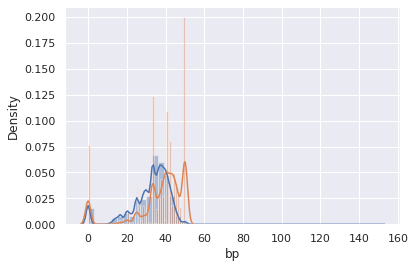

In [77]:
for _, subdf in bp_data.groupby('win/loss'):
    sns.distplot(subdf['bp']);

In [78]:
# разделяем долю выигранных брейкпоинтов на группы выше/ниже медианы
bp_data['many_bp'] = bp_data['bp']>bp_data['bp'].median()

In [79]:
pd.crosstab(bp_data['win/loss'].astype(bool), bp_data['many_bp'])

many_bp,False,True
win/loss,,
False,112953,29273
True,90177,52049


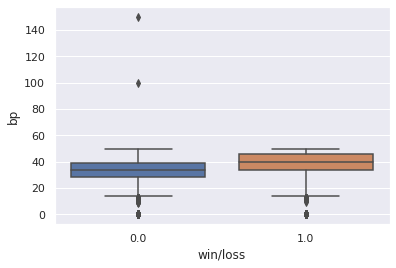

In [80]:
# посмотрим визуальное распределение доли выигранных bp
sns.boxplot(data=bp_data, x='win/loss', y='bp')

Для проверки гипотезы используем chi2_contingency https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

In [81]:
stats.chi2_contingency(pd.crosstab(bp_data['win/loss'].astype(bool), bp_data['many_bp']))

(8931.895708608228, 0.0, 1, array([[101565.,  40661.],
        [101565.,  40661.]]))

In [82]:
chisq_stats = stats.chi2_contingency(pd.crosstab(bp_data['win/loss'].astype(bool), bp_data['many_bp']), correction=False)[0]

In [83]:
n = np.sum(pd.crosstab(bp_data['win/loss'].astype(bool), bp_data['many_bp']))

In [84]:
n = n.sum()

In [85]:
minshape = min(pd.crosstab(bp_data['win/loss'].astype(bool), bp_data['many_bp']).shape)-1

In [86]:
cramer = np.sqrt((chisq_stats/n)/minshape)

In [87]:
cramer

0.17720925280642827

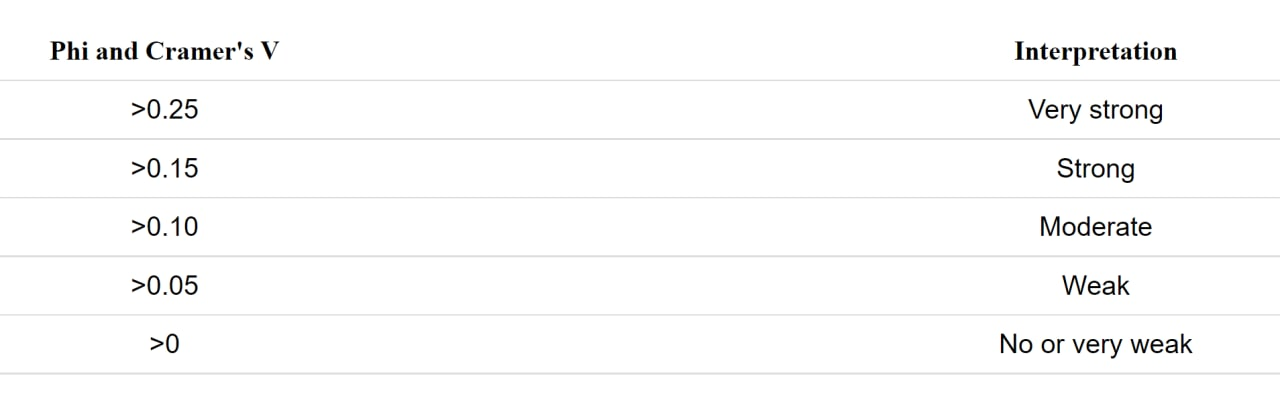

In [88]:
# разделяем долю выигранных брейкпоинтов на группы ниже медианы
bp_data['loss_bp'] = bp_data['bp']<bp_data['bp'].median()

In [89]:
stats.chi2_contingency(pd.crosstab(bp_data['win/loss'].astype(bool), bp_data['loss_bp']))

(14565.087820775163, 0.0, 1, array([[99193.5, 43032.5],
        [99193.5, 43032.5]]))

In [90]:
chisq_stats = stats.chi2_contingency(pd.crosstab(bp_data['win/loss'].astype(bool), bp_data['loss_bp']), correction=False)[0]

In [91]:
n = np.sum(pd.crosstab(bp_data['win/loss'].astype(bool), bp_data['loss_bp']))

In [92]:
n = n.sum()

In [93]:
minshape = min(pd.crosstab(bp_data['win/loss'].astype(bool), bp_data['loss_bp']).shape)-1

In [94]:
cramer = np.sqrt((chisq_stats/n)/minshape)

In [95]:
cramer

0.22629072074956144

Согласно показателю cramer, доля выигранных брейкпоинтов сильно влияют на результат матча

### Задание 1

Вы хотите узнать, как много значит ранг игрока в теннисе. Проверьте следующие утверждения:

а) Если ранг игрока выше более, чем на 20 позиций, то в среднем он будет выигрывать с большей вероятностью. (Если хотите проверить статистически — формируйте выборку как отклонение от ожидаемого количества побед при случайном исходе);

In [243]:
#сделаем столбец - разница в рангах проигравшего и победителя, так как ранг проигравшего чаще всего больше
df['delta_rank'] = df['loser_rank'] - df['winner_rank']

In [244]:
df_win = df.groupby(['winner_name'])['tourney_id'].count().reset_index()
df_win[df_win['winner_name'] == 'Roger Federer']

,winner_name,tourney_id
2533,Roger Federer,1265


In [245]:
df_win = df_win.rename(columns={'winner_name': 'name', 'tourney_id': 'win'})
df_win.head()

,name,win
0,A Galbraith,1
1,Aaron Krickstein,395
2,Abd Hazli Bin Zainuddin,1
3,Abdel Majid Soudani,2
4,Abdelhak Hameurlaine,3


In [246]:
df_loss = df.groupby(['loser_name'])['tourney_id'].count().reset_index()
df_loss[df_loss['loser_name'] == 'Roger Federer']

,loser_name,tourney_id
3744,Roger Federer,280


In [247]:
df_loss = df_loss.rename(columns={'loser_name': 'name', 'tourney_id': 'loss'})
df_loss.head()

,name,loss
0,A Difrancesco,1
1,A Galbraith,1
2,A Luttrell,1
3,A Moscoso,1
4,A Simcox,1


In [248]:
df_total = df_win.merge(df_loss, left_on='name', right_on='name')
df_total[df_total['name'] == 'Roger Federer']

,name,win,loss
2435,Roger Federer,1265,280


In [249]:
df_total['matches'] = df_total['win'] + df_total['loss']
df_total['%win'] = (df_total['win']/df_total['matches']) * 100
df_total.head()

,name,win,loss,matches,%win
0,A Galbraith,1,1,2,50.000000
1,Aaron Krickstein,395,258,653,60.490046
2,Abd Hazli Bin Zainuddin,1,3,4,25.000000
3,Abdel Majid Soudani,2,4,6,33.333333
4,Abdelhak Hameurlaine,3,12,15,20.000000


In [251]:
# сделаем тоже самое для матчей, где разница была более 20 рангов между соперниками
df_20 = df[df['delta_rank'] > 20]
df_20.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year,sets_num,w_bpSaved%,l_bpSaved%,delta_rank
0,2017-M020,Brisbane,Hard,32,A,2017-01-02,271,104678,NaN,NaN,...,10.0,29.0,1385.0,100.0,604.0,2017,2,25.000000,37.500000,71.0
1,2017-M020,Brisbane,Hard,32,A,2017-01-02,272,106378,NaN,NaN,...,10.0,45.0,1001.0,141.0,443.0,2017,2,40.000000,47.368421,96.0
4,2017-M020,Brisbane,Hard,32,A,2017-01-02,276,111442,NaN,WC,...,15.0,79.0,689.0,160.0,372.0,2017,2,33.333333,40.000000,81.0
9,2017-M020,Brisbane,Hard,32,A,2017-01-02,282,104745,5.0,NaN,...,4.0,9.0,3300.0,62.0,760.0,2017,2,40.000000,0.000000,53.0
10,2017-M020,Brisbane,Hard,32,A,2017-01-02,283,104999,NaN,NaN,...,3.0,51.0,874.0,351.0,132.0,2017,2,50.000000,0.000000,300.0


In [252]:
df_win_20 = df_20.groupby(['winner_name'])['tourney_id'].count().reset_index()
df_win_20 = df_win_20.rename(columns={'winner_name': 'name', 'tourney_id': 'win'})

In [274]:
df['delta_rank'].unique()

array([  71.,   96.,   10., ..., -830.,  914.,  984.])

In [253]:
df_loss_20 = df_20.groupby(['loser_name'])['tourney_id'].count().reset_index()
df_loss_20 = df_loss_20.rename(columns={'loser_name': 'name', 'tourney_id': 'loss'})

In [254]:
df_total_20 = df_win_20.merge(df_loss_20, left_on='name', right_on='name')
df_total_20[df_total_20['name'] == 'Roger Federer']

,name,win,loss
1366,Roger Federer,802,26


In [255]:
df_total_20['matches'] = df_total_20['win'] + df_total_20['loss']
df_total_20['%win'] = (df_total_20['win']/df_total_20['matches']) * 100
df_total_20.head()

,name,win,loss,matches,%win
0,Aaron Krickstein,256,63,319,80.250784
1,Abdullah Maqdas,3,7,10,30.000000
2,Adam Chadaj,1,1,2,50.000000
3,Adam Kellner,3,4,7,42.857143
4,Adam Malik,2,3,5,40.000000


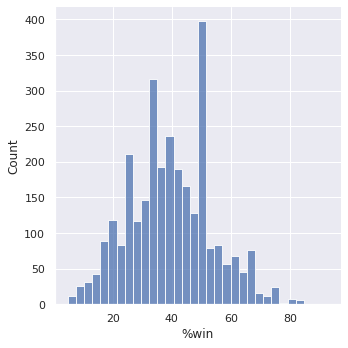

In [256]:
sns.displot(df_total['%win']);

In [257]:
# очень похоже распределение на нормальное, поэтому проверим еще с помощью qq-plot

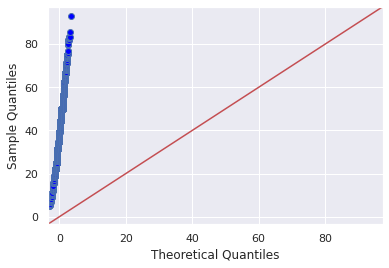

In [258]:
fig = sm.qqplot(df_total['%win'], line='45')
plt.show()

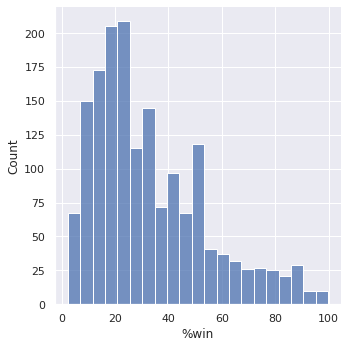

In [259]:
sns.displot(df_total_20['%win']);

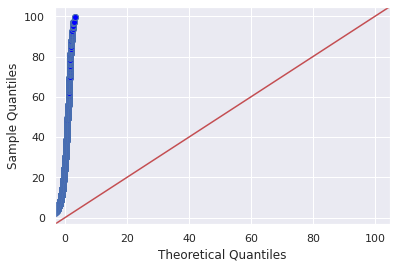

In [260]:
fig = sm.qqplot(df_total_20['%win'], line='45')
plt.show()

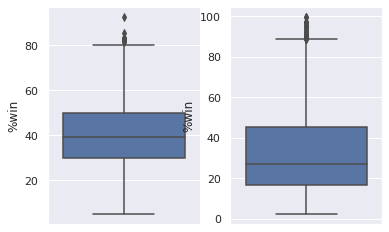

In [261]:
# посмотрим на разницу в боксплотах
fig, axes = plt.subplots(1, 2)
sns.boxplot(data=df_total, y='%win', ax=axes[0])
sns.boxplot(data=df_total_20, y='%win', ax=axes[1])

Все выборки распределены ненормально.
Выборки независимые

Для проверки выборк будет использован тест Манна-Уитни https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html?highlight=mann#scipy.stats.mannwhitneyu

In [262]:
_, p = stats.mannwhitneyu(df_total_20['%win'], df_total['%win'], alternative='less')
p

1.9629672561118716e-62

Таким образом, статистически подтверждено, что если у игрока ранг на 20 пунктов выше соперника, то возможность победить ниже, чем в среднестатистической выборке. 

б) Если ранг игрока находится в окне +-5 позиций, то вероятность победы будет значительно отличаться от гипотезы из предыдущего случая. Для проверки статистической значимости выборку можно сделать как среднее по годам (например, с 1980 по 2022г.). Подумайте, как правильно сформировать репрезентативную выборку.

In [263]:
#сделаем тоже самое для матчей, где разница была более 20 рангов между соперниками
df_5 = df[abs(df['delta_rank']) <= 5]
df_5.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year,sets_num,w_bpSaved%,l_bpSaved%,delta_rank
5,2017-M020,Brisbane,Hard,32,A,2017-01-02,277,103970,8.0,NaN,...,9.0,21.0,1785.0,26.0,1465.0,2017,2,40.000000,35.714286,5.0
24,2017-M020,Brisbane,Hard,32,A,2017-01-02,298,105453,3.0,NaN,...,2.0,5.0,4905.0,4.0,5315.0,2017,2,44.444444,0.000000,-1.0
27,2017-0891,Chennai,Hard,32,A,2017-01-02,271,104297,NaN,NaN,...,12.0,98.0,613.0,93.0,627.0,2017,3,33.333333,42.857143,-5.0
52,2017-0891,Chennai,Hard,32,A,2017-01-02,299,106421,NaN,NaN,...,7.0,99.0,611.0,96.0,616.0,2017,3,40.000000,30.000000,-3.0
67,2017-0451,Doha,Hard,32,A,2017-01-02,283,104597,NaN,NaN,...,7.0,44.0,1013.0,40.0,1090.0,2017,3,33.333333,36.363636,-4.0


In [264]:
df_win_5 = df_5.groupby(['winner_name'])['tourney_id'].count().reset_index()
df_win_5 = df_win_5.rename(columns={'winner_name': 'name', 'tourney_id': 'win'})

In [265]:
df_loss_5 = df_5.groupby(['loser_name'])['tourney_id'].count().reset_index()
df_loss_5 = df_loss_5.rename(columns={'loser_name': 'name', 'tourney_id': 'loss'})

In [266]:
df_total_5 = df_win_5.merge(df_loss_5, left_on='name', right_on='name')
df_total_5[df_total_5['name'] == 'Roger Federer']

,name,win,loss
680,Roger Federer,165,95


In [267]:
df_total_5['matches'] = df_total_5['win'] + df_total_5['loss']
df_total_5['%win'] = (df_total_5['win']/df_total_5['matches']) * 100
df_total_5.head()

,name,win,loss,matches,%win
0,Aaron Krickstein,20,17,37,54.054054
1,Adrian Garcia,2,4,6,33.333333
2,Adrian Mannarino,13,19,32,40.625000
3,Adrian Voinea,12,5,17,70.588235
4,Adriano Panatta,3,3,6,50.000000


In [268]:
# смотрим распределение выборки

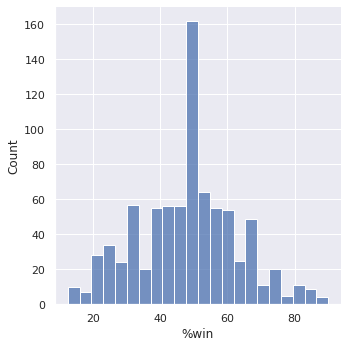

In [269]:
sns.displot(df_total_5['%win']);

In [270]:
# очень похоже распределение на нормальное, поэтому проверим еще с помощью qq-plot

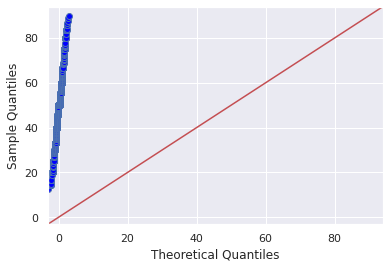

In [271]:
fig = sm.qqplot(df_total_5['%win'], line='45')
plt.show()

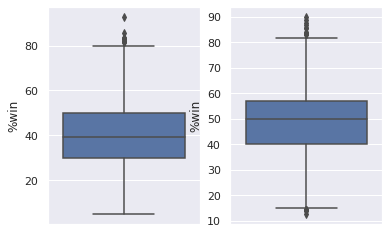

In [272]:
# посмотрим на разницу в боксплотах
fig, axes = plt.subplots(1, 2)
sns.boxplot(data=df_total, y='%win', ax=axes[0])
sns.boxplot(data=df_total_5, y='%win', ax=axes[1])

Все выборки распределены ненормально.
Выборки независимые

Для проверки выборк будет использован тест Манна-Уитни https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html?highlight=mann#scipy.stats.mannwhitneyu

In [273]:
_, p = stats.mannwhitneyu(df_total_5['%win'], df_total['%win'], alternative='greater')
p

1.3025213789638334e-50

Таким образом, статистически подтверждено, что если у соперника ранг на +/-5 пунктов больше, то возможность победить выше, чем в среднестатистической выборке